### Indeed job listings by township by occupation

In [149]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sb
import numpy as np

In [108]:
## create data set with labor force population by municipality
## put data in 'labor' dataframe

DP03 = pd.read_csv('Data/ACS_14_5YR_DP03.csv')
DP03 = DP03.iloc[1:,:].copy()
labor = DP03[['GEO.id2', 'GEO.display-label', 'HC01_VC04']]
labor.columns = ['FIPS','city_town', 'labor_force']

labor = labor[labor['labor_force']!='0']
labor['labor_force'] = labor['labor_force'].apply(pd.to_numeric)

In [116]:
labor.info()
labor.iloc[300:305]
labor['ind']= range(565)
labor.set_index('ind', inplace=True)
labor.index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 3 columns):
FIPS           565 non-null object
city_town      565 non-null object
labor_force    565 non-null int64
dtypes: int64(1), object(2)
memory usage: 17.7+ KB


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            555, 556, 557, 558, 559, 560, 561, 562, 563, 564],
           dtype='int64', name='ind', length=565)

In [42]:
## break out town and county names
s =pd.DataFrame([x.split(sep=',') for x in labor['city_town']])
s.columns = ['town','county','state']
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 3 columns):
town      565 non-null object
county    565 non-null object
state     565 non-null object
dtypes: object(3)
memory usage: 13.3+ KB


In [56]:
# configure the location for the indeed API lookup
#s['town'].apply.replace(' city','')
t =[muni.replace(' city','') for muni in s['town'] ]
t =[muni.replace(' borough','') for muni in t ]
t =[muni.replace(' township','') for muni in t ]
t =[muni.replace(' town','') for muni in t ]
t =[muni.replace(' ','+') for muni in t ]
t = [muni+',NJ' for muni in t ]
t

['Absecon,NJ',
 'Atlantic+City,NJ',
 'Brigantine,NJ',
 'Buena,NJ',
 'Buena+Vista,NJ',
 'Corbin+City,NJ',
 'Egg+Harbor,NJ',
 'Egg+Harbor+City,NJ',
 'Estell+Manor,NJ',
 'Folsom,NJ',
 'Galloway,NJ',
 'Hamilton,NJ',
 'Hammonton,NJ',
 'Linwood,NJ',
 'Longport,NJ',
 'Margate+City,NJ',
 'Mullica,NJ',
 'Northfield,NJ',
 'Pleasantville,NJ',
 'Port+Republic,NJ',
 'Somers+Point,NJ',
 'Ventnor+City,NJ',
 'Weymouth,NJ',
 'Allendale,NJ',
 'Alpine,NJ',
 'Bergenfield,NJ',
 'Bogota,NJ',
 'Carlstadt,NJ',
 'Cliffside+Park,NJ',
 'Closter,NJ',
 'Cresskill,NJ',
 'Demarest,NJ',
 'Dumont,NJ',
 'East+Rutherford,NJ',
 'Edgewater,NJ',
 'Elmwood+Park,NJ',
 'Emerson,NJ',
 'Englewood,NJ',
 'Englewood+Cliffs,NJ',
 'Fair+Lawn,NJ',
 'Fairview,NJ',
 'Fort+Lee,NJ',
 'Franklin+Lakes,NJ',
 'Garfield,NJ',
 'Glen+Rock,NJ',
 'Hackensack,NJ',
 'Harrington+Park,NJ',
 'Hasbrouck+Heights,NJ',
 'Haworth,NJ',
 'Hillsdale,NJ',
 'Ho-Ho-Kus,NJ',
 'Leonia,NJ',
 'Little+Ferry,NJ',
 'Lodi,NJ',
 'Lyndhurst,NJ',
 'Mahwah,NJ',
 'Maywood,NJ

In [57]:
labor['location']=t
labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 2 to 570
Data columns (total 5 columns):
FIPS           565 non-null object
city_town      565 non-null object
labor_force    565 non-null int64
town           565 non-null object
location       565 non-null object
dtypes: int64(1), object(4)
memory usage: 26.5+ KB


In [64]:
list(labor.location)[0]

'Absecon,NJ'

In [98]:
occupations = ['management','service', 'sales', 'maintenance', 'production', 'teacher', 'developer']

management=[]; service=[]; sales=[]; maintenance=[]; production=[]; teacher=[]; developer=[]
occ_lists = [management,service, sales, maintenance, production, teacher, developer]

for i in range(len(labor['location'])):
    loc = list(labor['location'])[i]
    for j in range(len(occupations)):
        source = "http://api.indeed.com/ads/apisearch?publisher=6660716131600223&q="+occupations[j]
        source+="&l="+ loc +"&radius=0"
        source+="&co=us&userip=1.2.3.4&useragent=Mozilla/%2F4.0%28Firefox%29&v=2"
        response = requests.get(source)
        occ_lists[j].append( ET.fromstring(response.text).find('.//totalresults').text )
        

In [99]:
#service  = service[5:]
#management = management[5:]
#len(developer)
jobs = pd.DataFrame(occ_lists).T
jobs.columns = occupations
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 7 columns):
management     565 non-null object
service        565 non-null object
sales          565 non-null object
maintenance    565 non-null object
production     565 non-null object
teacher        565 non-null object
developer      565 non-null object
dtypes: object(7)
memory usage: 31.0+ KB


In [117]:
jobs.index

RangeIndex(start=0, stop=565, step=1)

In [118]:
#for i in occupations:
#    jobs[i] = jobs[i].apply(pd.to_numeric)
jobs['FIPS'] = labor['FIPS']    
jobs.describe()

,management,service,sales,maintenance,production,teacher,developer
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,69.800000,104.210619,44.290265,23.454867,12.872566,5.909735,5.398230
std,163.407881,217.562162,90.162643,46.677749,31.419119,15.754004,30.525289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,30.000000,12.000000,7.000000,3.000000,1.000000,0.000000
75%,73.000000,120.000000,46.000000,26.000000,13.000000,6.000000,2.000000
max,2206.000000,2659.000000,742.000000,502.000000,458.000000,273.000000,646.000000


In [119]:
labor = labor.merge(jobs, on='FIPS')

In [120]:
labor.describe()

,labor_force,management,service,sales,maintenance,production,teacher,developer
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,8310.010619,69.800000,104.210619,44.290265,23.454867,12.872566,5.909735,5.398230
std,12414.187113,163.407881,217.562162,90.162643,46.677749,31.419119,15.754004,30.525289
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1868.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4355.000000,17.000000,30.000000,12.000000,7.000000,3.000000,1.000000,0.000000
75%,9839.000000,73.000000,120.000000,46.000000,26.000000,13.000000,6.000000,2.000000
max,143335.000000,2206.000000,2659.000000,742.000000,502.000000,458.000000,273.000000,646.000000


In [125]:
## jobs is the raw data number of job listings
jobs.to_pickle('jobs.pkl')
!ls *.pkl

acs_s.pkl	 AgeSexRace.pkl  jobs.pkl   muni_names.pkl	  sustain.pkl
acs_tax.pkl	 econ.pkl	 labor.pkl  muni.pkl		  taxes.pkl
acs_tax_sus.pkl  housing.pkl	 misc.pkl   njtrain_stations.pkl


In [127]:
## labor is jobs combined with the town info
labor.info()
#labor.to_pickle('labor.pkl')
labor[340:360]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 10 columns):
FIPS           565 non-null object
city_town      565 non-null object
labor_force    565 non-null int64
management     565 non-null int64
service        565 non-null int64
sales          565 non-null int64
maintenance    565 non-null int64
production     565 non-null int64
teacher        565 non-null int64
developer      565 non-null int64
dtypes: int64(8), object(2)
memory usage: 48.6+ KB


,FIPS,city_town,labor_force,management,service,sales,maintenance,production,teacher,developer
340,3402532640,"Holmdel township, Monmouth County, New Jersey",7557,135,237,94,44,32,3,23
341,3402533300,"Howell township, Monmouth County, New Jersey",27925,110,221,125,49,14,17,0
342,3402534200,"Interlaken borough, Monmouth County, New Jersey",417,0,0,0,0,0,0,0
343,3402536480,"Keansburg borough, Monmouth County, New Jersey",5535,9,18,1,0,1,3,0
344,3402536810,"Keyport borough, Monmouth County, New Jersey",3956,7,21,13,3,0,2,1
345,3402537560,"Lake Como borough, Monmouth County, New Jersey",1001,1,0,0,0,0,0,1
346,3402540770,"Little Silver borough, Monmouth County, New Je...",2815,11,15,8,4,1,0,1
347,3402541010,"Loch Arbour village, Monmouth County, New Jersey",121,0,0,0,0,0,0,0
348,3402541310,"Long Branch city, Monmouth County, New Jersey",16406,86,227,60,40,6,21,0
349,3402542990,"Manalapan township, Monmouth County, New Jersey",20516,56,121,61,21,6,20,2


In [174]:
def make_rate(job):
    rate_list = []
    for i in range(len(labor[job])):
        #calculate rate of job lisitings per 1000 population
        rate_list.append(np.log((labor[job][i]*1000/labor['labor_force'][i])+1))
    return rate_list    

In [175]:
labor['management_rate'] = make_rate('management')
labor['service_rate'] = make_rate('service')
labor['sales_rate'] = make_rate('sales')
labor['maintenance_rate'] = make_rate('maintenance')
labor['production_rate'] = make_rate('production')
labor['teacher_rate'] = make_rate('teacher')
labor['developer_rate'] = make_rate('developer')

In [176]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 17 columns):
FIPS                565 non-null object
city_town           565 non-null object
labor_force         565 non-null int64
management          565 non-null int64
service             565 non-null int64
sales               565 non-null int64
maintenance         565 non-null int64
production          565 non-null int64
teacher             565 non-null int64
developer           565 non-null int64
management_rate     565 non-null float64
service_rate        565 non-null float64
sales_rate          565 non-null float64
maintenance_rate    565 non-null float64
production_rate     565 non-null float64
teacher_rate        565 non-null float64
developer_rate      565 non-null float64
dtypes: float64(7), int64(8), object(2)
memory usage: 79.5+ KB


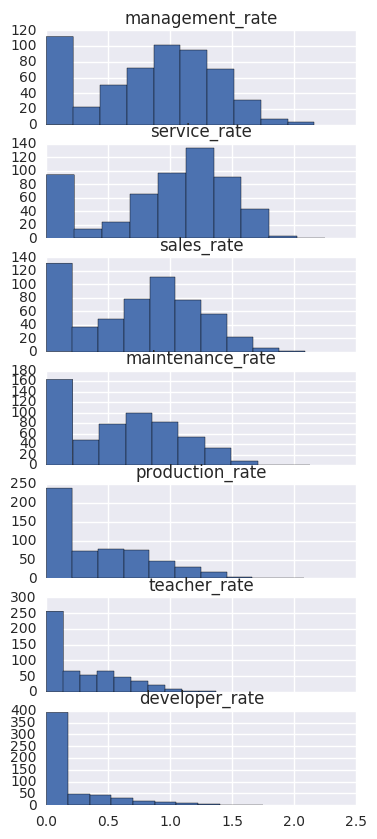

In [177]:
import matplotlib.pyplot as plt
import numpy as np


plt.close('all')

plt.figure(figsize=(4, 10))
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(7, sharex=True, figsize=(4,10))

axarr[0].hist(np.log(labor['management_rate']+1));
axarr[0].set_title('management_rate');
axarr[1].hist(np.log(labor['service_rate']+1));
axarr[1].set_title('service_rate');
axarr[2].hist(np.log(labor['sales_rate']+1));
axarr[2].set_title('sales_rate');
axarr[3].hist(np.log(labor['maintenance_rate']+1));
axarr[3].set_title('maintenance_rate');
axarr[4].hist(np.log(labor['production_rate']+1));
axarr[4].set_title('production_rate');
axarr[5].hist(np.log(labor['teacher_rate']+1));
axarr[5].set_title('teacher_rate');
axarr[6].hist(np.log(labor['developer_rate']+1));
axarr[6].set_title('developer_rate');


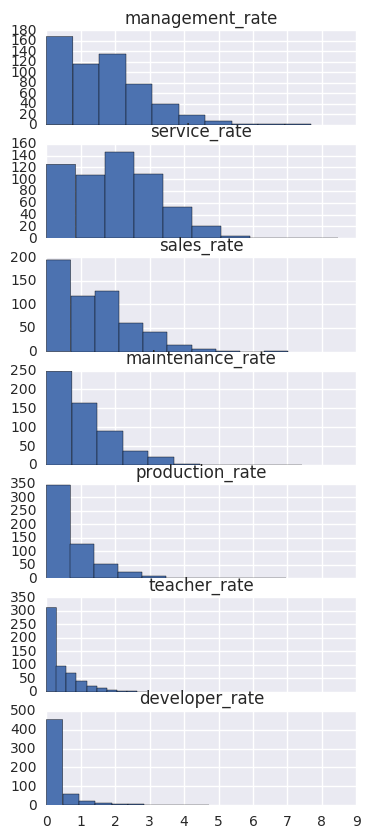

In [180]:
import matplotlib.pyplot as plt
import numpy as np


plt.close('all')

plt.figure(figsize=(4, 10))
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(7, sharex=True, figsize=(4,10))

axarr[0].hist(labor['management_rate']);
axarr[0].set_title('management_rate');
axarr[1].hist(labor['service_rate']);
axarr[1].set_title('service_rate');
axarr[2].hist(labor['sales_rate']);
axarr[2].set_title('sales_rate');
axarr[3].hist(labor['maintenance_rate']);
axarr[3].set_title('maintenance_rate');
axarr[4].hist(labor['production_rate']);
axarr[4].set_title('production_rate');
axarr[5].hist(labor['teacher_rate']);
axarr[5].set_title('teacher_rate');
axarr[6].hist(labor['developer_rate']);
axarr[6].set_title('developer_rate');


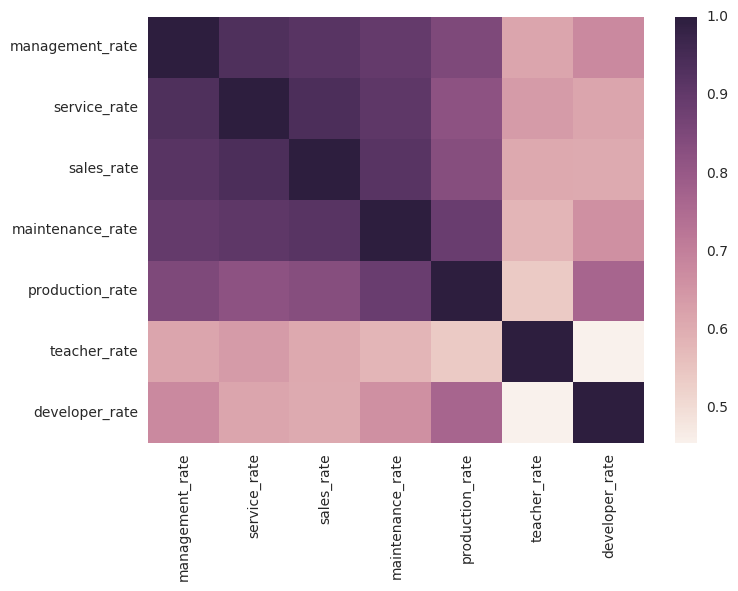

In [178]:
sb.heatmap(labor.loc[:,"management_rate":"developer_rate"].corr())

In [187]:
labor_combine = labor.loc[:,['FIPS','management_rate','teacher_rate','developer_rate']]
labor_combine.info()
labor_combine.to_pickle('labor_combine.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 4 columns):
FIPS               565 non-null object
management_rate    565 non-null float64
teacher_rate       565 non-null float64
developer_rate     565 non-null float64
dtypes: float64(3), object(1)
memory usage: 22.1+ KB


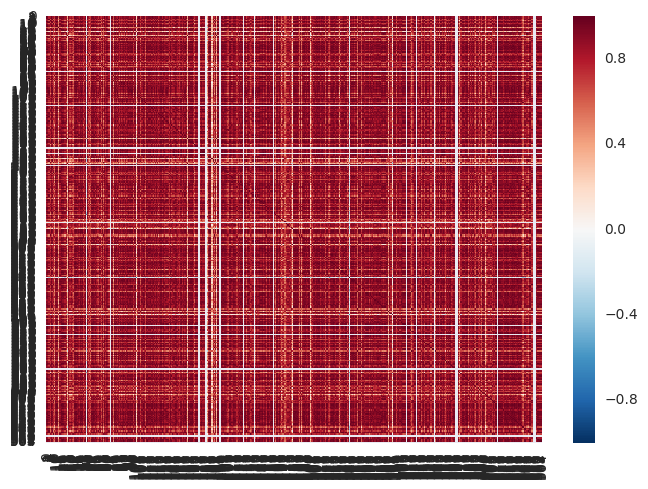

In [186]:
sb.heatmap(labor.loc[:,"management_rate":"developer_rate"].T.corr())

In [3]:
source = "http://api.indeed.com/ads/apisearch?publisher=6660716131600223&q="+"management"
source+="&l="+'woodbridge,nj'+"&radius=0"
source+="&co=us&userip=1.2.3.4&useragent=Mozilla/%2F4.0%28Firefox%29&v=2"

In [4]:
source

'http://api.indeed.com/ads/apisearch?publisher=6660716131600223&q=management&l=woodbridge,nj&radius=0&co=us&userip=1.2.3.4&useragent=Mozilla/%2F4.0%28Firefox%29&v=2'

In [5]:
response = requests.get(source)
response.headers['content-type']

'application/xml;charset=UTF-8'

In [11]:

root = ET.fromstring(response.text)


In [17]:
root.find('.//totalresults').text

'297'